In [29]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, classification_report, precision_recall_curve, recall_score, f1_score, roc_curve, roc_auc_score
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [30]:
# Tải tập dữ liệu
df = pd.read_csv('osteoporosis.csv')

print("Kích thước tập dữ liệu")
print(df.shape)

print("\n5 dòng đầu tiên:")
print(df.head())

print("\nThông tin tổng quan:")
print(df.info())

print("\nThống kê mô tả cho các cột số:")
print(df.describe())

print("\nSố lượng giá trị null trong từng cột:")
print(df.isnull().sum())

print("\nGiá trị duy nhất trong các cột phân loại:")
for column in df.select_dtypes(include=['object']).columns:
    print(f"{column}: {df[column].unique()}")

print("\nPhân bố của cột Osteoporosis:")
print(df['Osteoporosis'].value_counts())

print("\nGiá trị bất thường trong cột Age:")
print(df[(df['Age'] < 0) | (df['Age'] > 120)])
duplicates = df[df.duplicated(keep=False)]
print("Các dòng trùng lặp:")
print(duplicates)
print("\nSố dòng trùng lặp:", len(duplicates))

Kích thước tập dữ liệu
(1958, 11)

5 dòng đầu tiên:
   Age  Gender Family History  Body Weight Physical Activity Smoking  \
0  NaN  Female            Yes  Underweight            Active      No   
1  NaN    Male            Yes       Normal            Active     Yes   
2  NaN    Male            Yes       Normal         Sedentary      No   
3  NaN  Female             No       Normal         Sedentary      No   
4  NaN  Female            Yes  Underweight            Active     Yes   

  Alcohol Consumption    Medical Conditions      Medications Prior Fractures  \
0            Moderate  Rheumatoid Arthritis              NaN              No   
1                 NaN       Hyperthyroidism  Corticosteroids              No   
2            Moderate  Rheumatoid Arthritis              NaN              No   
3            Moderate  Rheumatoid Arthritis              NaN              No   
4                 NaN  Rheumatoid Arthritis              NaN              No   

   Osteoporosis  
0             1 

### Tiền xử lý dữ liệu

In [31]:
# Điền cột Age bằng trung vị
df['Age'] = df['Age'].fillna(df['Age'].median())

# Đưa các giá trị cột Gender về chỉ còn [Female, Male]
df['Gender'] = df['Gender'].str.lower()

df['Gender'] = df['Gender'].replace({
    'female': 'Female',
    'femal': 'Female',
    'male': 'Male',
    'm': 'Male',
    'male': 'Male'
})

# Đưa các giá trị cột Smoking về chỉ còn [Yes, No]
df['Smoking'] = df['Smoking'].replace({
    'yes': 'Yes',
    'no': 'No'
})

# Điền mode cho các cột ["Gender", "Hormonal Changes", "Race/Ethnicity", "Body Weight", "Physical Activity", "Prior Fractures"]
modeColumns = ["Gender", "Body Weight", "Physical Activity", "Prior Fractures"]
for c in modeColumns:
    df[c] = df[c].fillna(df[c].mode()[0])

# Điền giá trị cụ thể Unknown cho các cột ["Alcohol Consumption", "Medical Conditions", "Medications"]
unColumns = ["Alcohol Consumption", "Medical Conditions", "Medications"]
for c in unColumns:
    df[c] = df[c].fillna("Unknown")

print("\nSố lượng giá trị null trong từng cột:")
print(df.isnull().sum())
print("\nGiá trị duy nhất trong các cột phân loại:")
for column in df.select_dtypes(include=['object']).columns:
    print(f"{column}: {df[column].unique()}")



Số lượng giá trị null trong từng cột:
Age                    0
Gender                 0
Family History         0
Body Weight            0
Physical Activity      0
Smoking                0
Alcohol Consumption    0
Medical Conditions     0
Medications            0
Prior Fractures        0
Osteoporosis           0
dtype: int64

Giá trị duy nhất trong các cột phân loại:
Gender: ['Female' 'Male']
Family History: ['Yes' 'No']
Body Weight: ['Underweight' 'Normal']
Physical Activity: ['Active' 'Sedentary']
Smoking: ['No' 'Yes']
Alcohol Consumption: ['Moderate' 'Unknown']
Medical Conditions: ['Rheumatoid Arthritis' 'Hyperthyroidism' 'Unknown']
Medications: ['Unknown' 'Corticosteroids']
Prior Fractures: ['No' 'Yes']


### Chuẩn hóa dữ liệu

In [19]:
# df = pd.read_csv('osteoporosis.csv')
# df_dropped_multiple = df.drop(['Id','Hormonal Changes', 'Race/Ethnicity', 'Calcium Intake', 'Vitamin D Intake'], axis=1)
# df_dropped_multiple.to_csv('cleaned_data_col.csv', index=False)

In [18]:
# Chuẩn hóa z-score cho cột Age
scaler = StandardScaler()
df['Age'] = scaler.fit_transform(df[['Age']])

# Chuẩn hóa Label Encoding
lb = LabelEncoder()
columnsLabel = ["Gender", "Body Weight", "Family History", 
                "Physical Activity", "Smoking",
                "Prior Fractures"]
columnsOneHot = [ "Alcohol Consumption", "Medications", "Medical Conditions"]
for c in columnsLabel:
    df[c] = lb.fit_transform(df[c])
    
# Chuẩn hóa one-hot encoding cho cột Medical Conditions
# df = pd.get_dummies(df, columns=['Medical Conditions'], dtype=int)   
df = pd.get_dummies(df, columns=columnsOneHot, dtype=int)   

In [32]:
# Chuẩn hóa z-score cho cột Age
scaler = StandardScaler()
df['Age'] = scaler.fit_transform(df[['Age']])

binary_map = {"no": 0, "yes": 1}

binary_columns = [
    "Gender",
    "Family History",
    "Body Weight",
    "Physical Activity",
    "Smoking",
    "Prior Fractures"
]
binary_maps = {
    "Gender": {
        "Female": 0,
        "Male": 1,
    },
    "Family History": {
        "No": 0,
        "Yes": 1
    },
    "Body Weight": {
        "Underweight": 0,
        "Normal": 1
    },
    "Physical Activity": {
        "Sedentary": 0,
        "Active": 1
    },
    "Smoking": {
        "No": 0,
        "Yes": 1
    },
    "Prior Fractures": {
        "No": 0,
        "Yes": 1
    }
}
for col, mapping in binary_maps.items():
    df[col] = df[col].map(mapping)    
    
# Chuẩn hóa one-hot encoding cho cột Medical Conditions
# df = pd.get_dummies(df, columns=['Medical Conditions'], dtype=int)   
df = pd.get_dummies(df, columns=columnsOneHot, dtype=int)   

In [33]:
correlation_matrix = df.corr()
osteoporosis_correlation = correlation_matrix['Osteoporosis']
print("Giá trị tương quan với Osteoporosis:")
print(osteoporosis_correlation.sort_values(ascending=False))
osteoporosis = osteoporosis_correlation.sort_values(ascending=False)
# Xóa các cột tương quan yếu (|r| <0)
importantCol = osteoporosis[abs(osteoporosis) >= 0].index
df_final = df[importantCol]
print(df_final.shape)

# Xuất file dữ liệu cuối
df_final.to_csv('cleaned_data.csv', index=False)

Giá trị tương quan với Osteoporosis:
Osteoporosis                               1.000000
Age                                        0.688449
Medications_Corticosteroids                0.034724
Prior Fractures                            0.015344
Gender                                     0.010248
Medical Conditions_Hyperthyroidism         0.009331
Medical Conditions_Rheumatoid Arthritis    0.003982
Alcohol Consumption_Moderate               0.003055
Family History                            -0.001041
Alcohol Consumption_Unknown               -0.003055
Medical Conditions_Unknown                -0.013398
Physical Activity                         -0.017335
Smoking                                   -0.017362
Medications_Unknown                       -0.034724
Body Weight                               -0.040864
Name: Osteoporosis, dtype: float64
(1958, 15)


### Huấn luyện mô hình

In [34]:
df_train = pd.read_csv("cleaned_data.csv")

# Lấy cột biến mục tiêu và biến đặc trưng
y = df_train["Osteoporosis"]
X = df_train.drop(["Osteoporosis"], axis=1)

# Chia tập huấn luyện và test, tỉ lệ 7-3
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
lr = LogisticRegression()

lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

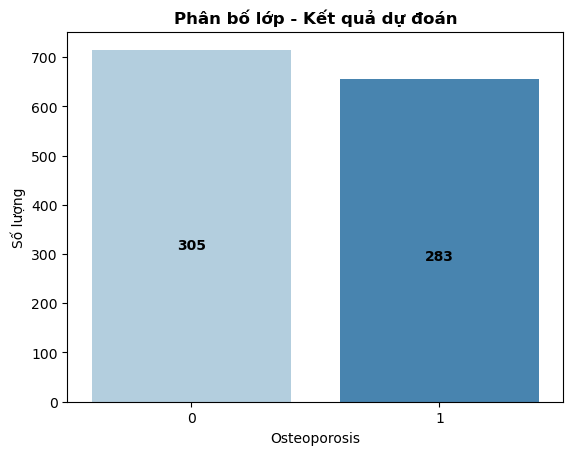

In [27]:
y_pred  = pd.Series(y_pred,  name='Osteoporosis')
sns.countplot(x=y_train, palette='Blues')
plt.title('Phân bố lớp - Kết quả dự đoán', fontweight='bold')
plt.xlabel('Osteoporosis')
plt.ylabel('Số lượng')
for i, v in enumerate(y_pred.value_counts().sort_index()):
    plt.text(i, v + 5, str(v), ha='center', fontweight='bold')

In [38]:
y_train_pred = lr.predict(X_train)
y_test_pred  = lr.predict(X_test)

# Xác suất (cho AUC)
y_train_prob = lr.predict_proba(X_train)[:,1]
y_test_prob  = lr.predict_proba(X_test)[:,1]

print("Train Accuracy:", accuracy_score(y_train, y_train_pred))
print("Test Accuracy :", accuracy_score(y_test, y_test_pred))

print("Train AUC:", roc_auc_score(y_train, y_train_prob))
print("Test AUC :", roc_auc_score(y_test, y_test_prob))

Train Accuracy: 0.8277372262773722
Test Accuracy : 0.8350340136054422
Train AUC: 0.9016270752148614
Test AUC : 0.909258718383083


In [35]:
accuracy = accuracy_score(y_test, y_pred)
print("Độ chính xác:", accuracy)

# Đánh giá
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1-score:", f1_score(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
print("Ma trận nhầm lẫn:\n", cm)

Độ chính xác: 0.8350340136054422
Accuracy: 0.8350340136054422
Precision: 0.897887323943662
Recall: 0.7894736842105263
F1-score: 0.8401976935749588
Ma trận nhầm lẫn:
 [[236  29]
 [ 68 255]]


In [29]:
# Đánh giá
y_pred_proba = lr.predict_proba(X_test)[:, 1]
y_pred_adjusted = (y_pred_proba >= 0.3).astype(int)
print("Kết quả với chỉ Age (ngưỡng 0.3):")
print("Accuracy:", accuracy_score(y_test, y_pred_adjusted))
print("Precision:", precision_score(y_test, y_pred_adjusted))
print("Recall:", recall_score(y_test, y_pred_adjusted))
print("F1-score:", f1_score(y_test, y_pred_adjusted))
cm = confusion_matrix(y_test, y_pred_adjusted)
print("Ma trận nhầm lẫn:\n", cm)

Kết quả với chỉ Age (ngưỡng 0.3):
Accuracy: 0.814625850340136
Precision: 0.8057142857142857
Recall: 0.8730650154798761
F1-score: 0.8380386329866271
Ma trận nhầm lẫn:
 [[197  68]
 [ 41 282]]
